# PGP Data Science Engineering
# Exploratory Data Analysis – Mini Project:

A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using data based approach. During a recent hiring drive, you were selected for the Data Science team as a Junior data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the players, the clubs they are currently playing for and various performance measures.
There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players.

Data:
The data contains details for over 18,000 players playing in various football clubs in Europe. It contains information on age, skill rating, wages and player value, etc. The files provided are as folows: 
fifa.csv – data file.
fifa_ variable_information.csv - information on individual variables.

Data Preprocessing:
1.	Import the necessary libraries and read the data.
2.	Drop any columns that you deem unecessary for analysis.
3.	The following columns need to be converted for further analysis:

Column	Details	Required output
'Value'	Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.
'Wage'	 Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.
'Joined'	Year as a string, in some cases complete date as string	Convert to int with only year
'Contract Valid Until'	Date as a string 	Convert to datetime type
'Height'	In inches with a quotation mark 	Convert to Float with decimal points
'Weight'	Contains the suffix lbs 	Remove the suffix and convert to float
'Release Clause'	Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.
(You might encounter Nan values in the above columns. Pandas treats Nan values as float. Please keep that in mind when making the conversions.)

4.	Check for missing values and do a mean imputation where necessary.


Exploratory Analysis:

1.	Plot the distribution of Overall rating for all players. 
2.	Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause
3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
a)	What would the average wage for this set of players be?
b)	What is the average age?
c)	Is there a correlation between the Overall rating and Value for these players?

4.	Generate tables containing the top 5 players by Overall rating for each unique position.
a)	Are there any players appearing in more than one Table. Please point out such players.
b)	What is the average wage one can expect to pay for the top 5 in every position?

Final Report:
Put all highlights from the information obtained above in a power point presentation containing a maximum of 5 slides. No title slide required.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
fifa = pd.read_csv("C:/Users/LOKESH ARUN BHIRUD/Desktop/EDA Mini Project/fifa.csv")
fifa

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [3]:
fifa.shape

(18207, 60)

In [4]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [5]:
fifa['Joined'].isna().sum()

1553

In [6]:
fifa['Joined']=fifa['Joined'].fillna('0')

In [7]:
def str4(x):
    if isinstance(x,str):
        return int(x[-4:])
fifa['Joined'] = fifa['Joined'].apply(str4)

In [8]:
fifa['Joined'].head(5)

0    2004
1    2018
2    2017
3    2011
4    2015
Name: Joined, dtype: int64

In [9]:
fifa['Contract Valid Until']= pd.to_datetime(fifa['Contract Valid Until'])
fifa['Contract Valid Until'].head()

0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract Valid Until, dtype: datetime64[ns]

- Weight

In [10]:
def llbs(x):
    l=[]
    if isinstance(x,str):
        l = x.split("lbs")
        i = l[0]
        return float(i)
fifa['Weight'] = fifa['Weight'].apply(llbs)

In [11]:
fifa['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

--Height

In [12]:
def feet(x):
    l=[]
    if isinstance(x,str):
        l = x.split("'")
        i = int(l[0])
        j = int(l[1])
        f = ((i*12)+j)/12
        return f
fifa['Height'] = fifa['Height'].apply(feet) 

In [13]:
fifa["Height"].head()

0    5.583333
1    6.166667
2    5.750000
3    6.333333
4    5.916667
Name: Height, dtype: float64

In [14]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null

In [15]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [16]:
df=fifa.drop(['Photo','Nationality','Flag','Club','Club Logo','Jersey Number'],axis=1, inplace=False)
df.columns

Index(['ID', 'Name', 'Age', 'Overall', 'Potential', 'Value', 'Wage',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [17]:
df.head(2)

,ID,Name,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,94,94,€110.5M,€565K,Left,5.0,4.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,94,94,€77M,€405K,Right,5.0,4.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 54 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null object
Position                    18147 non-null object
Joined                      18207 non-null int64
Loaned From                 1264 non-null object
Contract Valid Until        17918 non-null datetime64[ns]
Height                      18159 no

## 1.Plot the distribution of Overall rating for all players.

Text(0.5, 1.0, 'Distribution of Age')

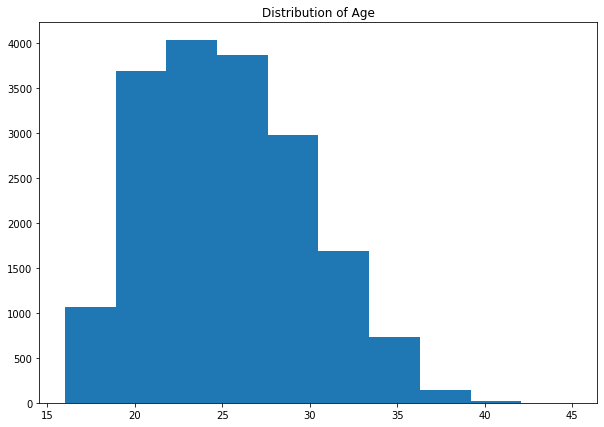

In [19]:
plt.figure(figsize=[10,7])
plt.hist(fifa["Age"])
plt.title("Distribution of Age")

Text(0.5, 1.0, 'Distribution of Age')

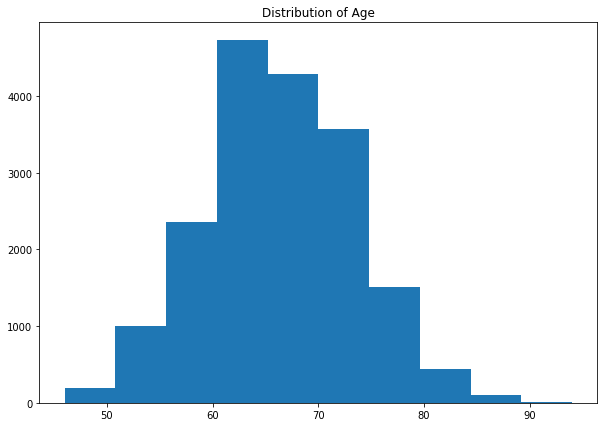

In [20]:
plt.figure(figsize=[10,7])
plt.hist(fifa["Overall"])
plt.title("Distribution of Age")

In [21]:
fifa["Overall"].mean()

66.23869940132916

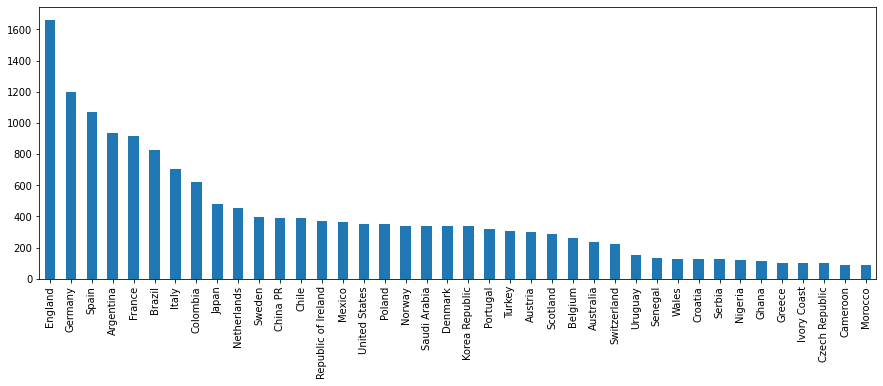

In [22]:
fifa["Nationality"].value_counts().head(40).plot(kind="bar", figsize = [15,5])

In [23]:
# Data Cleaning
football = fifa.copy()

In [24]:
# convert string of "Value" & "Wages" into float value
def str2float(euros):
    # convert m into millions
    if euros[-1] == "M":
        return float(euros[1:-1])*1000000
    elif euros[-1] == "K":
        return float(euros[1:-1])*1000
    else:
        return float(euros[1:])

football["Value"] = football["Value"].apply(lambda x : str2float(x))
football["Wage"] = football["Wage"].apply(lambda x : str2float(x))

In [25]:
football[["Name", "Value","Wage"]]

,Name,Value,Wage
0,L. Messi,110500000.0,565000.0
1,Cristiano Ronaldo,77000000.0,405000.0
2,Neymar Jr,118500000.0,290000.0
3,De Gea,72000000.0,260000.0
4,K. De Bruyne,102000000.0,355000.0
...,...,...,...
18202,J. Lundstram,60000.0,1000.0
18203,N. Christoffersson,60000.0,1000.0
18204,B. Worman,60000.0,1000.0
18205,D. Walker-Rice,60000.0,1000.0


## 2.Generate pair plots for the following variables: Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

In [26]:
football["Weight"].isna().sum()

48

In [27]:
football["Height"].isnull().sum()

48

In [28]:
football['ShortPassing'].fillna(football['ShortPassing'].mean(), inplace = True)

In [29]:
football['Volleys'].fillna(football['Volleys'].mean(), inplace = True)

In [30]:
football['Dribbling'].fillna(football['Dribbling'].mean(), inplace = True)

In [31]:
football['Curve'].fillna(football['Curve'].mean(), inplace = True)

In [32]:
football['FKAccuracy'].fillna(football['FKAccuracy'].mean(), inplace = True)

In [33]:
football['LongPassing'].fillna(football['LongPassing'].mean(), inplace = True)

In [34]:
football['BallControl'].fillna(football['BallControl'].mean(), inplace = True)

In [35]:
football['HeadingAccuracy'].fillna(football['HeadingAccuracy'].mean(), inplace = True)

In [36]:
football['Finishing'].fillna(football['Finishing'].mean(), inplace = True)

In [37]:
football['Crossing'].fillna(football['Crossing'].mean(), inplace = True)

In [38]:
football['Weight'].fillna(football['Weight'].mean(), inplace = True)

In [39]:
football['Height'].fillna(football['Height'].mean(), inplace = True)

In [40]:
football['Joined'].fillna(football['Joined'].mean(), inplace = True)

In [41]:
football['Position'].fillna('ST', inplace = True)

In [42]:
football['Work Rate'].fillna('Medium/ Medium', inplace = True)

In [43]:
football['Skill Moves'].fillna(football['Skill Moves'].mean(), inplace = True)

In [44]:
football['Weak Foot'].fillna(football['Weak Foot'].mean(), inplace = True)

In [45]:
football['Preferred Foot'].fillna('Right', inplace = True)

In [46]:
football['International Reputation'].fillna(1, inplace = True)

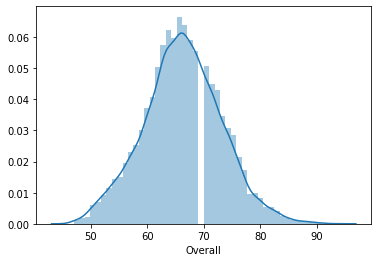

In [47]:
sns.distplot(football['Overall'])

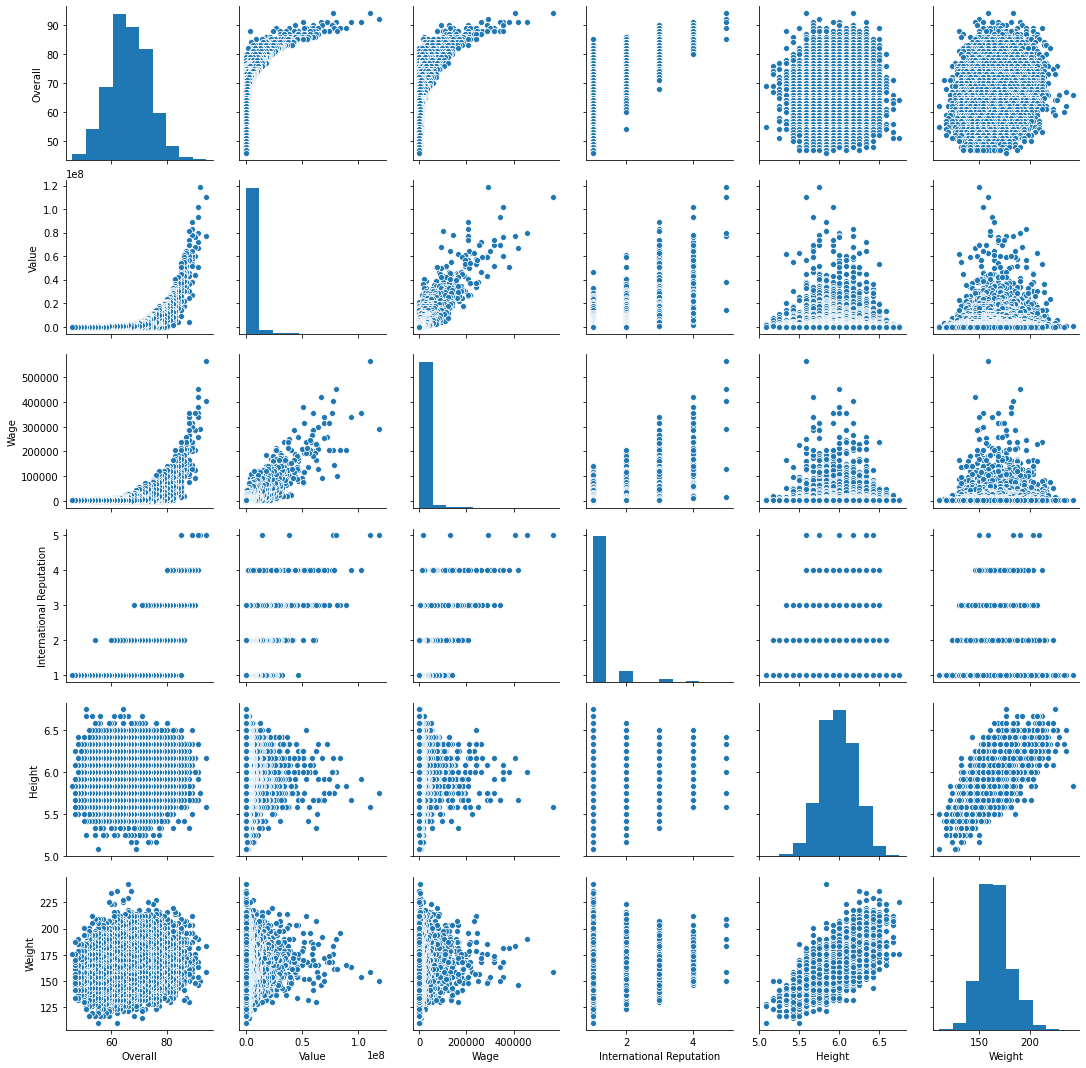

In [48]:
cols = football[['Overall', 'Value','Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']]
sns.pairplot(cols)
plt.show()

(array([1.7745e+04, 3.0500e+02, 9.3000e+01, 3.4000e+01, 1.2000e+01,
        8.0000e+00, 6.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([     0.,  56500., 113000., 169500., 226000., 282500., 339000.,
        395500., 452000., 508500., 565000.]),
 <a list of 10 Patch objects>)

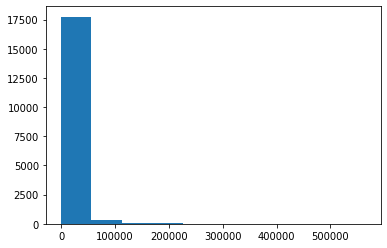

In [49]:
plt.hist(football["Wage"])

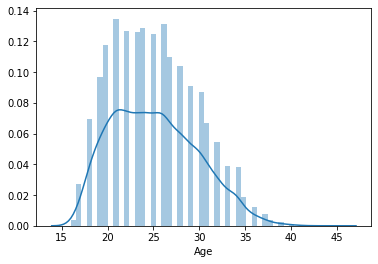

In [50]:
sns.distplot(football["Age"])

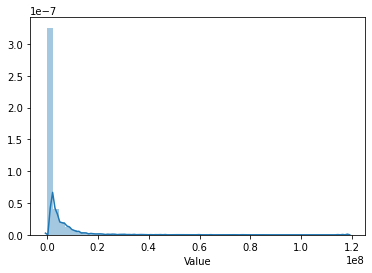

In [51]:
sns.distplot(football["Value"])

## 3.Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020. a) What would the average wage for this set of players be? b) What is the average age? c) Is there a correlation between the Overall rating and Value for these players?

In [52]:
c = cols.corr()
c

,Overall,Value,Wage,International Reputation,Height,Weight
Overall,1.000000,0.627085,0.571926,0.499654,0.038527,0.154557
Value,0.627085,1.000000,0.858442,0.653267,0.002686,0.045934
Wage,0.571926,0.858442,1.000000,0.668719,0.019638,0.064764
International Reputation,0.499654,0.653267,0.668719,1.000000,0.034877,0.088331
Height,0.038527,0.002686,0.019638,0.034877,1.000000,0.754678
Weight,0.154557,0.045934,0.064764,0.088331,0.754678,1.000000


In [53]:
d1 = football.sort_values(by='Overall',ascending=False)[football['Contract Valid Until']=='2020-01-01' ]
d1.head(20)

C:\Users\LOKESH ARUN BHIRUD\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M
24,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,€44.6M
21,179813,E. Cavani,31,https://cdn.sofifa.org/players/4/19/179813.png,Uruguay,https://cdn.sofifa.org/flags/60.png,89,89,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,€111M
39,164240,Thiago Silva,33,https://cdn.sofifa.org/players/4/19/164240.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,€44.4M
31,190460,C. Eriksen,26,https://cdn.sofifa.org/players/4/19/190460.png,Denmark,https://cdn.sofifa.org/flags/13.png,88,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,€141.5M
52,171877,M. Hamšík,30,https://cdn.sofifa.org/players/4/19/171877.png,Slovakia,https://cdn.sofifa.org/flags/43.png,87,87,Napoli,https://cdn.sofifa.org/teams/2/light/48.png,...,84.0,75.0,73.0,62.0,8.0,6.0,4.0,14.0,14.0,€79.1M


#### a)	What would the average wage for this set of players be?

In [54]:
d2 = d1.head(20)
print("the average wage for this set of players is:",d2['Wage'].mean())

the average wage for this set of players is: 206400.0


#### b)	What is the average age?

In [55]:
print("Avg age is:",d2['Age'].mean())

Avg age is: 30.6


#### c)	Is there a correlation between the Overall rating and Value for these players?

In [56]:
c =d2['Overall'].corr(d2["Value"])
print("Correlation is:",c)

Correlation is: 0.7667560633793189


##### Observation:
- yes there is good correlation between Overall and Value. from that we can conclude that value of player is depend on overall rating of player

#### 	Generate tables containing the top 5 players by Overall rating for each unique position.

In [57]:
pos = list(df['Position'].unique()) 
print('Total number of unique positions:', len(pos))

Total number of unique positions: 28


In [58]:
print(pos)

['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB', 'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM', 'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan]


In [59]:
l = []
for i in pos:
    print(df[df['Position']==i][['Overall','Name','Position']].head())
    print()

      Overall         Name Position
0          94     L. Messi       RF
50         87   D. Mertens       RF
528        80    D. Valeri       RF
890        78  L. Podolski       RF
1774       75     C. Ciano       RF

    Overall               Name Position
1        94  Cristiano Ronaldo       ST
10       90     R. Lewandowski       ST
16       89            H. Kane       ST
23       89          S. Agüero       ST
36       88            G. Bale       ST

    Overall        Name Position
2        92   Neymar Jr       LW
29       88  L. Insigne       LW
30       88        Isco       LW
32       88    Coutinho       LW
55       86     L. Sané       LW

    Overall           Name Position
3        91         De Gea       GK
9        90       J. Oblak       GK
18       89  M. ter Stegen       GK
19       89    T. Courtois       GK
22       89       M. Neuer       GK

    Overall          Name Position
4        91  K. De Bruyne      RCM
6        91     L. Modrić      RCM
53       87    I. Rak

In [60]:
football[football["Position"]=="RF"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
50,175943,D. Mertens,31,https://cdn.sofifa.org/players/4/19/175943.png,Belgium,https://cdn.sofifa.org/flags/7.png,87,87,Napoli,https://cdn.sofifa.org/teams/2/light/48.png,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,€76.5M
528,172114,D. Valeri,32,https://cdn.sofifa.org/players/4/19/172114.png,Argentina,https://cdn.sofifa.org/flags/52.png,80,80,Portland Timbers,https://cdn.sofifa.org/teams/2/light/111140.png,...,83.0,39.0,40.0,30.0,15.0,15.0,8.0,10.0,12.0,€17.3M
890,150516,L. Podolski,33,https://cdn.sofifa.org/players/4/19/150516.png,Germany,https://cdn.sofifa.org/flags/21.png,78,78,Vissel Kobe,https://cdn.sofifa.org/teams/2/light/101146.png,...,79.0,54.0,39.0,39.0,10.0,9.0,16.0,9.0,9.0,€8.1M
1774,201313,C. Ciano,28,https://cdn.sofifa.org/players/4/19/201313.png,Italy,https://cdn.sofifa.org/flags/27.png,75,75,Frosinone,https://cdn.sofifa.org/teams/2/light/111657.png,...,74.0,24.0,23.0,20.0,9.0,12.0,9.0,9.0,7.0,€11.7M


In [61]:
football[football["Position"]=="ST"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
10,188545,R. Lewandowski,29,https://cdn.sofifa.org/players/4/19/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,90,90,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,€127.1M
16,202126,H. Kane,24,https://cdn.sofifa.org/players/4/19/202126.png,England,https://cdn.sofifa.org/flags/14.png,89,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,€160.7M
23,153079,S. Agüero,30,https://cdn.sofifa.org/players/4/19/153079.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,89,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,€119.3M
36,173731,G. Bale,28,https://cdn.sofifa.org/players/4/19/173731.png,Wales,https://cdn.sofifa.org/flags/50.png,88,88,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,€123M


In [62]:
football[football["Position"]=="LW"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
29,198219,L. Insigne,27,https://cdn.sofifa.org/players/4/19/198219.png,Italy,https://cdn.sofifa.org/flags/27.png,88,88,Napoli,https://cdn.sofifa.org/teams/2/light/48.png,...,83.0,51.0,24.0,22.0,8.0,4.0,14.0,9.0,10.0,€105.4M
30,197781,Isco,26,https://cdn.sofifa.org/players/4/19/197781.png,Spain,https://cdn.sofifa.org/flags/45.png,88,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,86.0,60.0,64.0,51.0,10.0,8.0,12.0,15.0,6.0,€156.2M
32,189242,Coutinho,26,https://cdn.sofifa.org/players/4/19/189242.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,89,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,85.0,55.0,54.0,47.0,12.0,7.0,9.0,14.0,6.0,€147.7M
55,222492,L. Sané,22,https://cdn.sofifa.org/players/4/19/222492.png,Germany,https://cdn.sofifa.org/flags/21.png,86,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,78.0,36.0,32.0,35.0,8.0,12.0,9.0,9.0,14.0,€125.1M


In [63]:
football[football["Position"]=="GK"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M
18,192448,M. ter Stegen,26,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M
19,192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M
22,167495,M. Neuer,32,https://cdn.sofifa.org/players/4/19/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,89,89,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,€62.7M


In [64]:
football[football["Position"]=="RCM"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
53,168651,I. Rakitić,30,https://cdn.sofifa.org/players/4/19/168651.png,Croatia,https://cdn.sofifa.org/flags/10.png,87,87,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,81.0,72.0,74.0,70.0,14.0,11.0,12.0,5.0,9.0,€95.3M
82,212622,J. Kimmich,23,https://cdn.sofifa.org/players/4/19/212622.png,Germany,https://cdn.sofifa.org/flags/21.png,85,88,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,82.0,75.0,81.0,79.0,8.0,15.0,7.0,15.0,15.0,€69.9M
83,208421,Saúl,23,https://cdn.sofifa.org/players/4/19/208421.png,Spain,https://cdn.sofifa.org/flags/45.png,85,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,83.0,77.0,79.0,76.0,7.0,13.0,12.0,10.0,9.0,€107.3M


In [65]:
football[football["Position"]=="LF"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
15,211110,P. Dybala,24,https://cdn.sofifa.org/players/4/19/211110.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,€153.5M
76,41,Iniesta,34,https://cdn.sofifa.org/players/4/19/41.png,Spain,https://cdn.sofifa.org/flags/45.png,86,86,Vissel Kobe,https://cdn.sofifa.org/teams/2/light/101146.png,...,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,€26.9M
272,198164,Jonathan Viera,28,https://cdn.sofifa.org/players/4/19/198164.png,Spain,https://cdn.sofifa.org/flags/45.png,82,82,Beijing Sinobo Guoan FC,https://cdn.sofifa.org/teams/2/light/111768.png,...,80.0,56.0,68.0,55.0,16.0,16.0,9.0,14.0,9.0,€49.5M
1379,190577,S. Blanco,30,https://cdn.sofifa.org/players/4/19/190577.png,Argentina,https://cdn.sofifa.org/flags/52.png,76,76,Portland Timbers,https://cdn.sofifa.org/teams/2/light/111140.png,...,65.0,30.0,22.0,32.0,9.0,7.0,9.0,13.0,12.0,€11.3M


In [66]:
football[football["Position"]=="RS"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
109,41236,Z. Ibrahimović,36,https://cdn.sofifa.org/players/4/19/41236.png,Sweden,https://cdn.sofifa.org/flags/46.png,85,85,LA Galaxy,https://cdn.sofifa.org/teams/2/light/697.png,...,90.0,28.0,37.0,24.0,13.0,15.0,10.0,9.0,12.0,€21M
148,167397,Falcao,32,https://cdn.sofifa.org/players/4/19/167397.png,Colombia,https://cdn.sofifa.org/flags/56.png,84,84,AS Monaco,https://cdn.sofifa.org/teams/2/light/69.png,...,87.0,39.0,42.0,19.0,10.0,13.0,6.0,9.0,5.0,€47.5M
267,199451,W. Ben Yedder,27,https://cdn.sofifa.org/players/4/19/199451.png,France,https://cdn.sofifa.org/flags/18.png,82,82,Sevilla FC,https://cdn.sofifa.org/teams/2/light/481.png,...,84.0,34.0,33.0,26.0,6.0,13.0,9.0,7.0,7.0,€49.4M
357,202685,S. Zaza,27,https://cdn.sofifa.org/players/4/19/202685.png,Italy,https://cdn.sofifa.org/flags/27.png,81,82,Torino,https://cdn.sofifa.org/teams/2/light/54.png,...,72.0,54.0,42.0,50.0,7.0,13.0,9.0,7.0,9.0,NaN


In [67]:
football[football["Position"]=="RCB"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
39,164240,Thiago Silva,33,https://cdn.sofifa.org/players/4/19/164240.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,€44.4M
54,152729,Piqué,31,https://cdn.sofifa.org/players/4/19/152729.png,Spain,https://cdn.sofifa.org/flags/45.png,87,87,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,86.0,91.0,86.0,84.0,10.0,11.0,14.0,15.0,8.0,€69.7M
62,201535,R. Varane,25,https://cdn.sofifa.org/players/4/19/201535.png,France,https://cdn.sofifa.org/flags/18.png,86,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,88.0,87.0,11.0,11.0,9.0,5.0,14.0,€106.3M
70,184344,L. Bonucci,31,https://cdn.sofifa.org/players/4/19/184344.png,Italy,https://cdn.sofifa.org/flags/27.png,86,86,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,86.0,90.0,86.0,80.0,2.0,2.0,3.0,2.0,4.0,€49.5M


In [68]:
football[football["Position"]=="LCM"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
11,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M
13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M
52,171877,M. Hamšík,30,https://cdn.sofifa.org/players/4/19/171877.png,Slovakia,https://cdn.sofifa.org/flags/43.png,87,87,Napoli,https://cdn.sofifa.org/teams/2/light/48.png,...,84.0,75.0,73.0,62.0,8.0,6.0,4.0,14.0,14.0,€79.1M
63,199556,M. Verratti,25,https://cdn.sofifa.org/players/4/19/199556.png,Italy,https://cdn.sofifa.org/flags/27.png,86,89,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,93.0,78.0,83.0,80.0,12.0,12.0,15.0,15.0,10.0,€105.9M
114,212198,Bruno Fernandes,23,https://cdn.sofifa.org/players/4/19/212198.png,Portugal,https://cdn.sofifa.org/flags/38.png,84,88,Sporting CP,https://cdn.sofifa.org/teams/2/light/237.png,...,83.0,63.0,66.0,53.0,12.0,14.0,15.0,8.0,14.0,€84M


In [69]:
football[football["Position"]=="CB"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
12,182493,D. Godín,32,https://cdn.sofifa.org/players/4/19/182493.png,Uruguay,https://cdn.sofifa.org/flags/60.png,90,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,€90.2M
42,205600,S. Umtiti,24,https://cdn.sofifa.org/players/4/19/205600.png,France,https://cdn.sofifa.org/flags/18.png,87,92,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,82.0,90.0,89.0,86.0,15.0,10.0,14.0,12.0,15.0,€121.1M
73,177509,M. Benatia,31,https://cdn.sofifa.org/players/4/19/177509.png,Morocco,https://cdn.sofifa.org/flags/129.png,86,86,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,82.0,89.0,87.0,85.0,7.0,4.0,8.0,7.0,11.0,€49.5M
89,192366,N. Otamendi,30,https://cdn.sofifa.org/players/4/19/192366.png,Argentina,https://cdn.sofifa.org/flags/52.png,85,85,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,80.0,83.0,85.0,84.0,12.0,5.0,8.0,11.0,12.0,€52.7M
102,171919,Naldo,35,https://cdn.sofifa.org/players/4/19/171919.png,Brazil,https://cdn.sofifa.org/flags/54.png,85,85,FC Schalke 04,https://cdn.sofifa.org/teams/2/light/34.png,...,84.0,86.0,88.0,85.0,14.0,10.0,14.0,8.0,14.0,€15.3M


In [70]:
football[football["Position"]=="LDM"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
14,215914,N. Kanté,27,https://cdn.sofifa.org/players/4/19/215914.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,85.0,90.0,91.0,85.0,15.0,12.0,10.0,7.0,10.0,€121.3M
91,187961,Paulinho,29,https://cdn.sofifa.org/players/4/19/187961.png,Brazil,https://cdn.sofifa.org/flags/54.png,85,85,Guangzhou Evergrande Taobao FC,https://cdn.sofifa.org/teams/2/light/111839.png,...,80.0,75.0,81.0,73.0,16.0,16.0,11.0,6.0,8.0,NaN
119,207865,Marquinhos,24,https://cdn.sofifa.org/players/4/19/207865.png,Brazil,https://cdn.sofifa.org/flags/54.png,84,89,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,79.0,85.0,87.0,87.0,6.0,6.0,12.0,10.0,13.0,€68.3M
217,176266,Lucas Leiva,31,https://cdn.sofifa.org/players/4/19/176266.png,Brazil,https://cdn.sofifa.org/flags/54.png,83,83,Lazio,https://cdn.sofifa.org/teams/2/light/46.png,...,86.0,82.0,82.0,78.0,10.0,8.0,8.0,5.0,6.0,€29.8M
323,228702,F. de Jong,21,https://cdn.sofifa.org/players/4/19/228702.png,Netherlands,https://cdn.sofifa.org/flags/34.png,81,89,Ajax,https://cdn.sofifa.org/teams/2/light/245.png,...,86.0,69.0,73.0,70.0,7.0,13.0,10.0,10.0,9.0,€41.6M


In [71]:
football[football["Position"]=="CAM"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
17,194765,A. Griezmann,27,https://cdn.sofifa.org/players/4/19/194765.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,€165.8M
31,190460,C. Eriksen,26,https://cdn.sofifa.org/players/4/19/190460.png,Denmark,https://cdn.sofifa.org/flags/13.png,88,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,€141.5M
61,201942,Roberto Firmino,26,https://cdn.sofifa.org/players/4/19/201942.png,Brazil,https://cdn.sofifa.org/flags/54.png,86,87,Liverpool,https://cdn.sofifa.org/teams/2/light/9.png,...,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,€104.7M
66,189596,T. Müller,28,https://cdn.sofifa.org/players/4/19/189596.png,Germany,https://cdn.sofifa.org/flags/21.png,86,86,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,€74.3M
74,176635,M. Özil,29,https://cdn.sofifa.org/players/4/19/176635.png,Germany,https://cdn.sofifa.org/flags/21.png,86,86,Arsenal,https://cdn.sofifa.org/teams/2/light/1.png,...,82.0,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,€82.7M


In [72]:
football[football["Position"]=="LS"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
21,179813,E. Cavani,31,https://cdn.sofifa.org/players/4/19/179813.png,Uruguay,https://cdn.sofifa.org/flags/60.png,89,89,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,€111M
38,167664,G. Higuaín,30,https://cdn.sofifa.org/players/4/19/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,88,88,Milan,https://cdn.sofifa.org/teams/2/light/47.png,...,86.0,35.0,22.0,18.0,5.0,12.0,7.0,5.0,10.0,NaN
100,179844,Diego Costa,29,https://cdn.sofifa.org/players/4/19/179844.png,Spain,https://cdn.sofifa.org/flags/45.png,85,85,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,83.0,58.0,39.0,34.0,11.0,13.0,12.0,8.0,11.0,€78.9M
151,143076,A. Gómez,30,https://cdn.sofifa.org/players/4/19/143076.png,Argentina,https://cdn.sofifa.org/flags/52.png,84,84,Atalanta,https://cdn.sofifa.org/teams/2/light/39.png,...,84.0,50.0,30.0,34.0,8.0,11.0,12.0,9.0,6.0,€51M
174,208093,Gerard Moreno,26,https://cdn.sofifa.org/players/4/19/208093.png,Spain,https://cdn.sofifa.org/flags/45.png,83,85,Villarreal CF,https://cdn.sofifa.org/teams/2/light/483.png,...,72.0,43.0,41.0,41.0,15.0,12.0,7.0,12.0,10.0,€69.6M


In [73]:
football[football["Position"]=="LCB"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
24,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,€44.6M
34,178603,M. Hummels,29,https://cdn.sofifa.org/players/4/19/178603.png,Germany,https://cdn.sofifa.org/flags/21.png,88,88,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,91.0,88.0,90.0,88.0,15.0,6.0,10.0,5.0,6.0,€75.9M
44,201024,K. Koulibaly,27,https://cdn.sofifa.org/players/4/19/201024.png,Senegal,https://cdn.sofifa.org/flags/136.png,87,90,Napoli,https://cdn.sofifa.org/teams/2/light/48.png,...,78.0,91.0,88.0,86.0,7.0,11.0,7.0,13.0,5.0,€90.5M
51,172871,J. Vertonghen,31,https://cdn.sofifa.org/players/4/19/172871.png,Belgium,https://cdn.sofifa.org/flags/7.png,87,87,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,83.0,90.0,87.0,88.0,6.0,10.0,9.0,12.0,7.0,€62.9M
59,203376,V. van Dijk,26,https://cdn.sofifa.org/players/4/19/203376.png,Netherlands,https://cdn.sofifa.org/flags/34.png,86,88,Liverpool,https://cdn.sofifa.org/teams/2/light/9.png,...,83.0,88.0,89.0,84.0,13.0,10.0,13.0,11.0,11.0,€87.9M


In [74]:
football[football["Position"]=="RM"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
25,231747,K. Mbappé,19,https://cdn.sofifa.org/players/4/19/231747.png,France,https://cdn.sofifa.org/flags/18.png,88,95,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,€166.1M
26,209331,M. Salah,26,https://cdn.sofifa.org/players/4/19/209331.png,Egypt,https://cdn.sofifa.org/flags/111.png,88,89,Liverpool,https://cdn.sofifa.org/teams/2/light/9.png,...,91.0,38.0,43.0,41.0,14.0,14.0,9.0,11.0,14.0,€137.3M
122,204970,F. Thauvin,25,https://cdn.sofifa.org/players/4/19/204970.png,France,https://cdn.sofifa.org/flags/18.png,84,87,Olympique de Marseille,https://cdn.sofifa.org/teams/2/light/219.png,...,82.0,46.0,29.0,31.0,8.0,11.0,14.0,10.0,9.0,€77M
137,185020,José Callejón,31,https://cdn.sofifa.org/players/4/19/185020.png,Spain,https://cdn.sofifa.org/flags/45.png,84,84,Napoli,https://cdn.sofifa.org/teams/2/light/48.png,...,79.0,64.0,32.0,32.0,8.0,5.0,14.0,11.0,11.0,€46.8M
138,183898,A. Di María,30,https://cdn.sofifa.org/players/4/19/183898.png,Argentina,https://cdn.sofifa.org/flags/52.png,84,84,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,82.0,35.0,59.0,56.0,10.0,7.0,11.0,12.0,11.0,€54.6M


In [75]:
football[football["Position"]=="LAM"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
28,198710,J. Rodríguez,26,https://cdn.sofifa.org/players/4/19/198710.png,Colombia,https://cdn.sofifa.org/flags/56.png,88,89,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,NaN
365,199434,D. Tadić,29,https://cdn.sofifa.org/players/4/19/199434.png,Serbia,https://cdn.sofifa.org/flags/51.png,81,81,Ajax,https://cdn.sofifa.org/teams/2/light/245.png,...,82.0,46.0,34.0,26.0,11.0,11.0,14.0,9.0,16.0,€24.5M
1587,230408,Fabrio Farinha,26,https://cdn.sofifa.org/players/4/19/230408.png,Brazil,https://cdn.sofifa.org/flags/54.png,75,75,Atlético Mineiro,https://cdn.sofifa.org/teams/2/light/1035.png,...,76.0,23.0,56.0,48.0,8.0,15.0,11.0,7.0,15.0,€13.3M
2247,230487,Leo Caldeirinha,34,https://cdn.sofifa.org/players/4/19/230487.png,Brazil,https://cdn.sofifa.org/flags/54.png,74,74,Vitória,https://cdn.sofifa.org/teams/2/light/1719.png,...,76.0,25.0,24.0,22.0,18.0,16.0,13.0,15.0,15.0,€5.4M
2342,230276,Nicolás Formido,30,https://cdn.sofifa.org/players/4/19/230276.png,Brazil,https://cdn.sofifa.org/flags/54.png,74,74,Internacional,https://cdn.sofifa.org/teams/2/light/1048.png,...,72.0,18.0,29.0,21.0,9.0,8.0,8.0,7.0,12.0,€10.5M


In [76]:
football[football["Position"]=="LM"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
33,188567,P. Aubameyang,29,https://cdn.sofifa.org/players/4/19/188567.png,Gabon,https://cdn.sofifa.org/flags/115.png,88,88,Arsenal,https://cdn.sofifa.org/teams/2/light/1.png,...,86.0,27.0,25.0,36.0,6.0,9.0,15.0,9.0,9.0,€112.1M
58,208722,S. Mané,26,https://cdn.sofifa.org/players/4/19/208722.png,Senegal,https://cdn.sofifa.org/flags/136.png,86,87,Liverpool,https://cdn.sofifa.org/teams/2/light/9.png,...,80.0,42.0,42.0,38.0,10.0,10.0,15.0,7.0,14.0,€102.7M
65,190483,Douglas Costa,27,https://cdn.sofifa.org/players/4/19/190483.png,Brazil,https://cdn.sofifa.org/flags/54.png,86,86,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,84.0,45.0,38.0,34.0,13.0,15.0,9.0,12.0,5.0,€76.7M
68,188350,M. Reus,29,https://cdn.sofifa.org/players/4/19/188350.png,Germany,https://cdn.sofifa.org/flags/21.png,86,86,Borussia Dortmund,https://cdn.sofifa.org/teams/2/light/22.png,...,84.0,47.0,36.0,45.0,12.0,12.0,13.0,13.0,11.0,€74M
86,193747,Koke,26,https://cdn.sofifa.org/players/4/19/193747.png,Spain,https://cdn.sofifa.org/flags/45.png,85,86,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,78.0,80.0,69.0,51.0,14.0,12.0,5.0,10.0,13.0,€95.6M


In [77]:
football[football["Position"]=="LB"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
35,176676,Marcelo,30,https://cdn.sofifa.org/players/4/19/176676.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,86.0,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0,€88.2M
49,189332,Jordi Alba,29,https://cdn.sofifa.org/players/4/19/189332.png,Spain,https://cdn.sofifa.org/flags/45.png,87,87,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,79.0,72.0,84.0,85.0,13.0,15.0,13.0,6.0,13.0,€77.9M
64,191043,Alex Sandro,27,https://cdn.sofifa.org/players/4/19/191043.png,Brazil,https://cdn.sofifa.org/flags/54.png,86,86,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,82.0,81.0,84.0,84.0,7.0,7.0,9.0,12.0,5.0,€60.2M
85,197445,D. Alaba,26,https://cdn.sofifa.org/players/4/19/197445.png,Austria,https://cdn.sofifa.org/flags/4.png,85,87,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,79.0,80.0,82.0,80.0,5.0,7.0,14.0,15.0,9.0,€65.6M
106,164169,Filipe Luís,32,https://cdn.sofifa.org/players/4/19/164169.png,Brazil,https://cdn.sofifa.org/flags/54.png,85,85,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,88.0,78.0,84.0,86.0,11.0,15.0,9.0,9.0,5.0,€44.1M


In [78]:
football[football["Position"]=="RDM"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
45,195864,P. Pogba,25,https://cdn.sofifa.org/players/4/19/195864.png,France,https://cdn.sofifa.org/flags/18.png,87,91,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,€123.2M
134,190584,Illarramendi,28,https://cdn.sofifa.org/players/4/19/190584.png,Spain,https://cdn.sofifa.org/flags/45.png,84,84,Real Sociedad,https://cdn.sofifa.org/teams/2/light/457.png,...,79.0,69.0,83.0,80.0,15.0,7.0,11.0,14.0,12.0,€65.1M
198,193474,I. Gueye,28,https://cdn.sofifa.org/players/4/19/193474.png,Senegal,https://cdn.sofifa.org/flags/136.png,83,83,Everton,https://cdn.sofifa.org/teams/2/light/7.png,...,80.0,84.0,89.0,84.0,8.0,6.0,8.0,12.0,13.0,€39.9M
223,53302,D. De Rossi,34,https://cdn.sofifa.org/players/4/19/53302.png,Italy,https://cdn.sofifa.org/flags/27.png,83,83,Roma,https://cdn.sofifa.org/teams/2/light/52.png,...,87.0,90.0,82.0,80.0,10.0,7.0,13.0,10.0,9.0,€13.6M
298,183498,M. Parolo,33,https://cdn.sofifa.org/players/4/19/183498.png,Italy,https://cdn.sofifa.org/flags/27.png,82,82,Lazio,https://cdn.sofifa.org/teams/2/light/46.png,...,78.0,78.0,80.0,82.0,13.0,9.0,6.0,7.0,9.0,€15.3M


In [79]:
football[football["Position"]=="RW"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
56,218667,Bernardo Silva,23,https://cdn.sofifa.org/players/4/19/218667.png,Portugal,https://cdn.sofifa.org/flags/38.png,86,91,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,85.0,49.0,44.0,35.0,9.0,10.0,14.0,12.0,9.0,€114.5M
60,202652,R. Sterling,23,https://cdn.sofifa.org/players/4/19/202652.png,England,https://cdn.sofifa.org/flags/14.png,86,89,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,77.0,47.0,58.0,54.0,15.0,12.0,12.0,15.0,9.0,€108.8M
79,220834,Marco Asensio,22,https://cdn.sofifa.org/players/4/19/220834.png,Spain,https://cdn.sofifa.org/flags/45.png,85,92,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,83.0,40.0,42.0,39.0,13.0,9.0,6.0,12.0,10.0,€121.5M
84,204485,R. Mahrez,27,https://cdn.sofifa.org/players/4/19/204485.png,Algeria,https://cdn.sofifa.org/flags/97.png,85,85,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,86.0,45.0,31.0,18.0,15.0,9.0,13.0,11.0,6.0,€74.9M
93,184941,A. Sánchez,29,https://cdn.sofifa.org/players/4/19/184941.png,Chile,https://cdn.sofifa.org/flags/55.png,85,85,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,84.0,38.0,44.0,35.0,10.0,10.0,15.0,12.0,13.0,€69.4M


In [80]:
football[football["Position"]=="CM"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
67,189509,Thiago,27,https://cdn.sofifa.org/players/4/19/189509.png,Spain,https://cdn.sofifa.org/flags/45.png,86,86,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,85.0,67.0,63.0,65.0,6.0,11.0,7.0,9.0,13.0,€75.1M
78,223848,S. Milinković-Savić,23,https://cdn.sofifa.org/players/4/19/223848.png,Serbia,https://cdn.sofifa.org/flags/51.png,85,90,Lazio,https://cdn.sofifa.org/teams/2/light/46.png,...,82.0,75.0,77.0,72.0,7.0,10.0,7.0,16.0,7.0,€89.6M
121,205498,Jorginho,26,https://cdn.sofifa.org/players/4/19/205498.png,Italy,https://cdn.sofifa.org/flags/27.png,84,87,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,79.0,63.0,78.0,70.0,14.0,7.0,13.0,14.0,8.0,€73.2M
136,186942,I. Gündoğan,27,https://cdn.sofifa.org/players/4/19/186942.png,Germany,https://cdn.sofifa.org/flags/21.png,84,84,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,87.0,73.0,68.0,64.0,11.0,14.0,5.0,5.0,13.0,€59.2M
161,220971,N. Keïta,23,https://cdn.sofifa.org/players/4/19/220971.png,Guinea,https://cdn.sofifa.org/flags/118.png,83,88,Liverpool,https://cdn.sofifa.org/teams/2/light/9.png,...,79.0,68.0,62.0,61.0,7.0,14.0,15.0,14.0,9.0,€67.2M


In [81]:
football[football["Position"]=="RB"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
69,184432,Azpilicueta,28,https://cdn.sofifa.org/players/4/19/184432.png,Spain,https://cdn.sofifa.org/flags/45.png,86,86,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,78.0,88.0,90.0,86.0,13.0,9.0,10.0,6.0,5.0,€64.8M
123,204963,Carvajal,26,https://cdn.sofifa.org/players/4/19/204963.png,Spain,https://cdn.sofifa.org/flags/45.png,84,87,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,77.0,83.0,83.0,85.0,13.0,13.0,15.0,9.0,15.0,€66.9M
135,188377,K. Walker,28,https://cdn.sofifa.org/players/4/19/188377.png,England,https://cdn.sofifa.org/flags/14.png,84,84,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,75.0,78.0,84.0,83.0,12.0,6.0,16.0,15.0,8.0,€45.3M
192,199564,Sergi Roberto,26,https://cdn.sofifa.org/players/4/19/199564.png,Spain,https://cdn.sofifa.org/flags/45.png,83,86,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,76.0,75.0,83.0,83.0,14.0,16.0,11.0,15.0,10.0,€56.3M
216,177457,L. Bender,29,https://cdn.sofifa.org/players/4/19/177457.png,Germany,https://cdn.sofifa.org/flags/21.png,83,83,Bayer 04 Leverkusen,https://cdn.sofifa.org/teams/2/light/32.png,...,83.0,88.0,86.0,82.0,12.0,6.0,7.0,12.0,7.0,€34M


In [82]:
football[football["Position"]=="RAM"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
129,193082,J. Cuadrado,30,https://cdn.sofifa.org/players/4/19/193082.png,Colombia,https://cdn.sofifa.org/flags/56.png,84,84,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,80.0,63.0,70.0,74.0,5.0,5.0,13.0,6.0,9.0,€48.7M
171,208670,H. Ziyech,25,https://cdn.sofifa.org/players/4/19/208670.png,Morocco,https://cdn.sofifa.org/flags/129.png,83,86,Ajax,https://cdn.sofifa.org/teams/2/light/245.png,...,83.0,52.0,66.0,36.0,11.0,7.0,11.0,8.0,14.0,€47.9M
1705,230465,Allan Bardinho,26,https://cdn.sofifa.org/players/4/19/230465.png,Brazil,https://cdn.sofifa.org/flags/54.png,75,75,Botafogo,https://cdn.sofifa.org/teams/2/light/517.png,...,71.0,23.0,33.0,32.0,12.0,8.0,17.0,8.0,15.0,€13.3M
2242,230483,Jacson Zonta,34,https://cdn.sofifa.org/players/4/19/230483.png,Brazil,https://cdn.sofifa.org/flags/54.png,74,74,Vitória,https://cdn.sofifa.org/teams/2/light/1719.png,...,66.0,31.0,21.0,22.0,8.0,14.0,9.0,9.0,12.0,€5.4M
2322,230267,Sebas Couteira,30,https://cdn.sofifa.org/players/4/19/230267.png,Brazil,https://cdn.sofifa.org/flags/54.png,74,74,Atlético Paranaense,https://cdn.sofifa.org/teams/2/light/1039.png,...,71.0,32.0,52.0,41.0,15.0,13.0,12.0,10.0,9.0,€10.5M


In [83]:
football[football["Position"]=="CF"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
271,198706,Luis Alberto,25,https://cdn.sofifa.org/players/4/19/198706.png,Spain,https://cdn.sofifa.org/flags/45.png,82,85,Lazio,https://cdn.sofifa.org/teams/2/light/46.png,...,72.0,44.0,25.0,18.0,6.0,8.0,6.0,12.0,11.0,€50.6M
293,184431,S. Giovinco,31,https://cdn.sofifa.org/players/4/19/184431.png,Italy,https://cdn.sofifa.org/flags/27.png,82,82,Toronto FC,https://cdn.sofifa.org/teams/2/light/111651.png,...,82.0,23.0,29.0,28.0,6.0,3.0,6.0,3.0,3.0,€30M
350,205175,A. Milik,24,https://cdn.sofifa.org/players/4/19/205175.png,Poland,https://cdn.sofifa.org/flags/37.png,81,88,Napoli,https://cdn.sofifa.org/teams/2/light/48.png,...,72.0,35.0,34.0,32.0,9.0,16.0,16.0,15.0,6.0,€48.5M
382,187072,L. Stindl,29,https://cdn.sofifa.org/players/4/19/187072.png,Germany,https://cdn.sofifa.org/flags/21.png,81,81,Borussia Mönchengladbach,https://cdn.sofifa.org/teams/2/light/23.png,...,83.0,59.0,61.0,50.0,7.0,10.0,13.0,11.0,12.0,€30.6M
407,144622,Raffael,33,https://cdn.sofifa.org/players/4/19/144622.png,Brazil,https://cdn.sofifa.org/flags/54.png,81,81,Borussia Mönchengladbach,https://cdn.sofifa.org/teams/2/light/23.png,...,79.0,43.0,42.0,31.0,12.0,10.0,5.0,13.0,14.0,€18.7M


In [84]:
football[football["Position"]=="RWB"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
450,207862,M. Ginter,24,https://cdn.sofifa.org/players/4/19/207862.png,Germany,https://cdn.sofifa.org/flags/21.png,80,82,Borussia Mönchengladbach,https://cdn.sofifa.org/teams/2/light/23.png,...,71.0,82.0,84.0,77.0,12.0,10.0,6.0,8.0,10.0,€27.5M
465,203605,P. Kadeřábek,26,https://cdn.sofifa.org/players/4/19/203605.png,Czech Republic,https://cdn.sofifa.org/flags/12.png,80,81,TSG 1899 Hoffenheim,https://cdn.sofifa.org/teams/2/light/10029.png,...,78.0,72.0,79.0,76.0,10.0,11.0,14.0,13.0,7.0,€24.9M
517,180216,S. Coleman,29,https://cdn.sofifa.org/players/4/19/180216.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,80,80,Everton,https://cdn.sofifa.org/teams/2/light/7.png,...,82.0,78.0,84.0,82.0,5.0,15.0,10.0,13.0,7.0,€20.9M
652,197083,D. Caligiuri,30,https://cdn.sofifa.org/players/4/19/197083.png,Italy,https://cdn.sofifa.org/flags/27.png,79,79,FC Schalke 04,https://cdn.sofifa.org/teams/2/light/34.png,...,76.0,70.0,72.0,68.0,12.0,10.0,13.0,6.0,14.0,€15.3M
766,221342,Pablo Maffeo,20,https://cdn.sofifa.org/players/4/19/221342.png,Spain,https://cdn.sofifa.org/flags/45.png,78,86,VfB Stuttgart,https://cdn.sofifa.org/teams/2/light/36.png,...,62.0,76.0,81.0,80.0,10.0,7.0,14.0,12.0,15.0,€24.7M


In [85]:
football[football["Position"]=="LWB"].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
474,200536,N. Schulz,25,https://cdn.sofifa.org/players/4/19/200536.png,Germany,https://cdn.sofifa.org/flags/21.png,80,81,TSG 1899 Hoffenheim,https://cdn.sofifa.org/teams/2/light/10029.png,...,75.0,74.0,76.0,77.0,13.0,9.0,15.0,7.0,14.0,€25.7M
581,223682,Granell,29,https://cdn.sofifa.org/players/4/19/223682.png,Spain,https://cdn.sofifa.org/flags/45.png,79,79,Girona FC,https://cdn.sofifa.org/teams/2/light/110062.png,...,69.0,55.0,75.0,65.0,6.0,13.0,13.0,14.0,14.0,€25.2M
601,210455,Jonny,24,https://cdn.sofifa.org/players/4/19/210455.png,Spain,https://cdn.sofifa.org/flags/45.png,79,83,Wolverhampton Wanderers,https://cdn.sofifa.org/teams/2/light/110.png,...,70.0,77.0,79.0,82.0,7.0,10.0,12.0,10.0,6.0,NaN
605,208334,J. Hector,28,https://cdn.sofifa.org/players/4/19/208334.png,Germany,https://cdn.sofifa.org/flags/21.png,79,79,1. FC Köln,https://cdn.sofifa.org/teams/2/light/31.png,...,78.0,76.0,79.0,79.0,9.0,10.0,10.0,12.0,14.0,€15M
787,214026,J. Mojica,25,https://cdn.sofifa.org/players/4/19/214026.png,Colombia,https://cdn.sofifa.org/flags/56.png,78,81,Girona FC,https://cdn.sofifa.org/teams/2/light/110062.png,...,69.0,67.0,78.0,79.0,13.0,8.0,14.0,9.0,15.0,€22.8M


## - Are there any players appearing in more than one Table. Please point out such players.

In [86]:
dd = football['ID']

In [87]:
l = []
for i in dd:
    if (football[football['ID']==i]['Position'].count()>=2):
        l.append(i)
if l==[]:
    print('NO such a players appearing in more than one table') 
else:
    print('YES, there are players appearing in more than one table',set(l))

NO such a players appearing in more than one table


### - What is the average wage one can expect to pay for the top 5 in every position?

In [88]:
for i in pos:
    print('Average wage for the top 5 in ',i,':',football[football['Position']==i]['Wage'].head(5).mean())

Average wage for the top 5 in  RF : 148000.0
Average wage for the top 5 in  ST : 294000.0
Average wage for the top 5 in  LW : 261000.0
Average wage for the top 5 in  GK : 192800.0
Average wage for the top 5 in  RCM : 240800.0
Average wage for the top 5 in  LF : 121200.0
Average wage for the top 5 in  RS : 132200.0
Average wage for the top 5 in  RCB : 231000.0
Average wage for the top 5 in  LCM : 184400.0
Average wage for the top 5 in  CB : 139600.0
Average wage for the top 5 in  LDM : 126600.0
Average wage for the top 5 in  CAM : 174000.0
Average wage for the top 5 in  CDM : 217000.0
Average wage for the top 5 in  LS : 130200.0
Average wage for the top 5 in  LCB : 162000.0
Average wage for the top 5 in  RM : 131400.0
Average wage for the top 5 in  LAM : 81600.0
Average wage for the top 5 in  LM : 164600.0
Average wage for the top 5 in  LB : 177200.0
Average wage for the top 5 in  RDM : 105000.0
Average wage for the top 5 in  RW : 202000.0
Average wage for the top 5 in  CM : 130600.0
Av

In [89]:
football["Wage"].mean()

9731.312132696215

In [90]:
x = football["Overall"]
y = football["Value"]
z = x.corr(y)
print(z)

0.6270852347261975


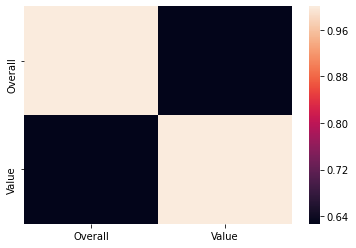

In [91]:
cols = ["Overall", "Value"]
corrmat = football[cols].corr()
sns.heatmap(corrmat)

In [92]:
football.sort_values(by = "Value", ascending = False)[["Name","Value","Wage"]][:20]

,Name,Value,Wage
2,Neymar Jr,118500000.0,290000.0
0,L. Messi,110500000.0,565000.0
4,K. De Bruyne,102000000.0,355000.0
5,E. Hazard,93000000.0,340000.0
15,P. Dybala,89000000.0,205000.0
16,H. Kane,83500000.0,205000.0
25,K. Mbappé,81000000.0,100000.0
7,L. Suárez,80000000.0,455000.0
17,A. Griezmann,78000000.0,145000.0
10,R. Lewandowski,77000000.0,205000.0


In [93]:
football.sort_values(by = "Wage", ascending = False)[["Name","Value","Wage"]][:20]

,Name,Value,Wage
0,L. Messi,110500000.0,565000.0
7,L. Suárez,80000000.0,455000.0
6,L. Modrić,67000000.0,420000.0
1,Cristiano Ronaldo,77000000.0,405000.0
8,Sergio Ramos,51000000.0,380000.0
11,T. Kroos,76500000.0,355000.0
36,G. Bale,60000000.0,355000.0
4,K. De Bruyne,102000000.0,355000.0
5,E. Hazard,93000000.0,340000.0
32,Coutinho,69500000.0,340000.0
